# Log Analysis with CountVectorizer for yarder

In [1]:
import pandas as pd

In [21]:
df = pd.read_csv("../input/yarder.txt",sep=';',index_col=0, parse_dates=True,
                 header=None,names=['timestamp','component','func_level','log_entry'])

In [11]:
pd.options.display.max_colwidth = 100 # controls max display

df.head()

,component,func_level,log_entry
timestamp,,,
03:06:07,system_metrics[6341]:,[lumberjack_svc_system_metrics.upgrades.models_1.INFO],"Enforcing aging policy (older than: 604800, min: None max: 2500000) for memory"
03:06:07,system_metrics[6341]:,[lumberjack_svc_system_metrics.upgrades.models_1.INFO],Deleted 10 metrics for memory (10081 left)
03:06:12,system_metrics[6341]:,[lumberjack_svc_system_metrics.upgrades.models_1.INFO],"Enforcing aging policy (older than: 518400, min: None max: None) for processes"
03:06:14,system_metrics[6341]:,[lumberjack_svc_system_metrics.upgrades.models_1.INFO],Deleted 7544 metrics for processes (6491016 left)
03:06:23,system_metrics[6341]:,[lumberjack_svc_system_metrics.upgrades.models_1.INFO],"Enforcing aging policy (older than: 604800, min: None max: None) for diskio"


In [39]:
# check for non INFO logs as well as any specific string within log entry
df = df[~df.func_level.str.contains("INFO")]

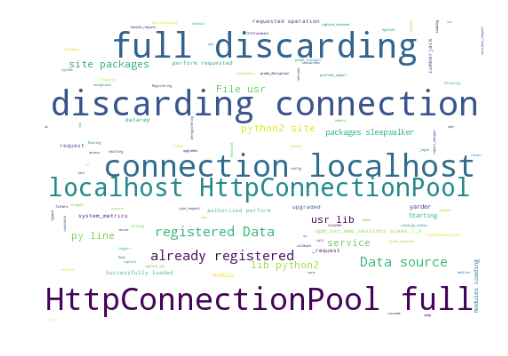

In [40]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

def plot_world_cloud (text):
    # Create stopword list:
    #stopwords = set(STOPWORDS)

    # Create and generate a word cloud image:
    #wordcloud = WordCloud(width=500, height=350, stopwords=stopwords, max_words=100, background_color="white").generate(text)
    wordcloud = WordCloud(width=500, height=350, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# get all log entries
text = " ".join(entry for entry in df.log_entry)
plot_world_cloud(text)

## Count Unigrams

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['log_entry'], 20)
for word, freq in common_words:
    print(word, freq)

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning:

numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88



connection 1621
localhost 1619
httpconnectionpool 1619
discarding 1619
source 23
data 23
registered 23
012 9
packages 9
python2 9
site 9
py 9
file 9
lib 9
line 9
usr 9
sleepwalker 6
services 5
loading 4
modules 4


## Bigrams

In [21]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['log_entry'], 20)
for word, freq in common_words:
    print(word, freq)

is full 1619
connection localhost 1619
httpconnectionpool is 1619
full discarding 1619
discarding connection 1619
already registered 23
data source 23
012 file 9
usr lib 9
python2 site 9
file usr 9
py line 9
lib python2 9
site packages 9
packages sleepwalker 6
service module 2
to perform 2
loading service 2
_request 012 2
sleepwalker connection 2


## Trigrams

In [22]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(df['log_entry'], 20)
for word, freq in common_words:
    print(word,"\t",freq)

httpconnectionpool is full 	 1619
is full discarding 	 1619
full discarding connection 	 1619
discarding connection localhost 	 1619
python2 site packages 	 9
012 file usr 	 9
file usr lib 	 9
lib python2 site 	 9
usr lib python2 	 9
site packages sleepwalker 	 6
authorized to perform 	 2
connection py line 	 2
service module lumberjack 	 2
npm_svc_web_sessions views_1_0 py 	 2
datarep py line 	 2
packages sleepwalker datarep 	 2
sleepwalker connection py 	 2
views_1_0 py line 	 2
sleepwalker datarep py 	 2
_request 012 file 	 2
